C:\Users\최지원\AppData\Local\Temp\ipykernel_16460\3082205168.py:20: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='cp949')


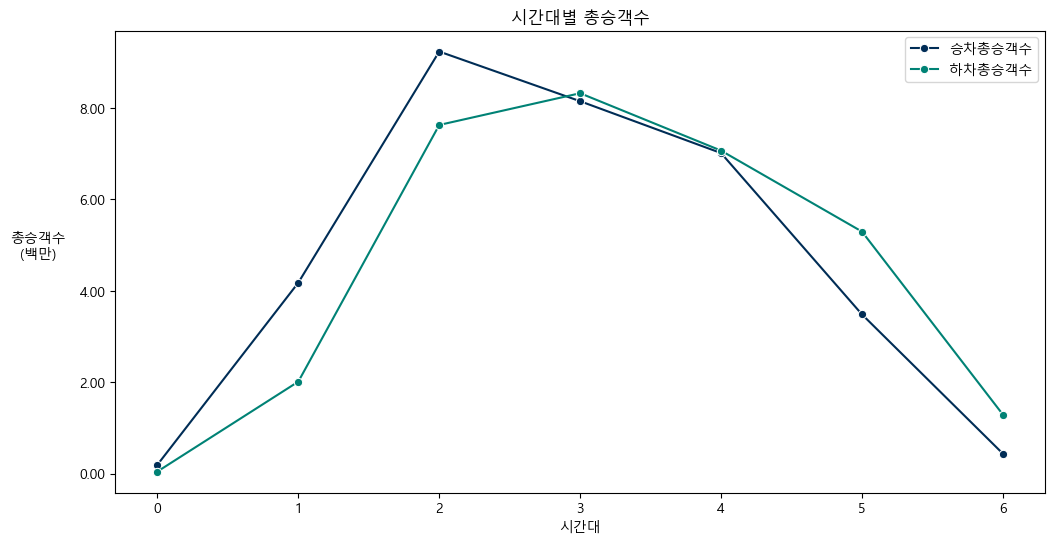

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager, rc
from matplotlib.ticker import MultipleLocator

# 파일 경로
folder_path = r'C:\Users\최지원\Downloads\학교\빅데이터\새 폴더\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 시간대별 승차총승객수와 하차총승객수의 합 계산
time_columns_boarding = [f'{hour}시승차총승객수' for hour in range(24)]
time_columns_alighting = [f'{hour}시하차총승객수' for hour in range(24)]

# 시간대별로 승차총승객수와 하차총승객수의 합 계산
time_passengers_boarding = merged_df[time_columns_boarding].sum()
time_passengers_alighting = merged_df[time_columns_alighting].sum()

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 'Malgun Gothic' 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 23시부터 1시까지 시각화
selected_hours = [23, 0, 1, 2, 3, 4, 5]

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=range(len(selected_hours)), y=time_passengers_boarding.iloc[selected_hours].values, label='승차총승객수', color='#002D56', marker='o')
ax = sns.lineplot(x=range(len(selected_hours)), y=time_passengers_alighting.iloc[selected_hours].values, label='하차총승객수', color='#008275', marker='o')
plt.xlabel('시간대')
plt.ylabel('총승객수\n(백만)', rotation=0, labelpad=30)
plt.title('시간대별 총승객수')

# y축 단위를 '백만'으로 표시하되, 소수점 둘째 자리까지 표시
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x/1e6)))

plt.show()
